Run on NERSC

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits
import healpy as hp
from astropy import wcs

from matplotlib.colors import LogNorm

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
ls /global/u1/d/dstn/legacypipe/py/halo*

/global/u1/d/dstn/legacypipe/py/halo-425315-N14.fits
/global/u1/d/dstn/legacypipe/py/halo-425315-N15.fits
/global/u1/d/dstn/legacypipe/py/halo-425315-N20.fits
/global/u1/d/dstn/legacypipe/py/halo-425315-N21.fits
/global/u1/d/dstn/legacypipe/py/halo-425315-N25.fits
/global/u1/d/dstn/legacypipe/py/halo-425332-S26.fits
/global/u1/d/dstn/legacypipe/py/halo-425332-S27.fits
/global/u1/d/dstn/legacypipe/py/halo-425332-S31.fits
/global/u1/d/dstn/legacypipe/py/halo-426215-N21.fits
/global/u1/d/dstn/legacypipe/py/halo-426215-N22.fits
/global/u1/d/dstn/legacypipe/py/halo-426215-N26.fits
/global/u1/d/dstn/legacypipe/py/halo-426215-N27.fits
/global/u1/d/dstn/legacypipe/py/halo-426215-N29.fits
/global/u1/d/dstn/legacypipe/py/halo-430393-N21.fits
/global/u1/d/dstn/legacypipe/py/halo-430393-N22.fits
/global/u1/d/dstn/legacypipe/py/halo-430393-N25.fits
/global/u1/d/dstn/legacypipe/py/halo-430393-N26.fits
/global/u1/d/dstn/legacypipe/py/halo-430395-S10.fits
/global/u1/d/dstn/legacypipe/py/halo-430395-S1

In [4]:
fn = '/global/u1/d/dstn/legacypipe/py/halo-535126-S14.fits'
fitsio.FITS(fn)


  file: /global/u1/d/dstn/legacypipe/py/halo-535126-S14.fits
  mode: READONLY
  extnum hdutype         hduname[v]
  0      IMAGE_HDU       
  1      BINARY_TBL      
  2      IMAGE_HDU       
  3      IMAGE_HDU       

In [5]:
tt = Table.read('/global/u1/d/dstn/legacypipe/py/halo-535126-S14.fits', hdu=1)
tt[:1]

<Table length=1>
      ra           dec      isgalaxy ... x_in_sub_ccd y_in_sub_ccd
   float64       float64     uint8   ...    int16        int16    
------------- ------------- -------- ... ------------ ------------
148.217079464 31.5736805918        0 ...          796         1487

In [6]:
sorted(tt.colnames)

['a_g_val',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_n_good_obs_al',
 'astrometric_n_obs_al',
 'astrometric_params_solved',
 'astrometric_sigma5d_max',
 'astrometric_weight_al',
 'ba',
 'dec',
 'dec_ivar',
 'decam_mag_g',
 'decam_mag_r',
 'decam_mag_z',
 'donotfit',
 'duplicated_source',
 'e_bp_min_rp_val',
 'flux',
 'freezeparams',
 'halo_radius_pix',
 'hmag',
 'ibx',
 'iby',
 'in_bounds',
 'inner_moffat_a',
 'inner_moffat_b',
 'isbright',
 'iscluster',
 'isgaia',
 'isgalaxy',
 'islargegalaxy',
 'ismedium',
 'jmag',
 'kmag',
 'mag',
 'outer_moffat_a',
 'outer_moffat_b',
 'outer_moffat_w',
 'outer_powerlaw_w',
 'pa',
 'parallax',
 'parallax_ivar',
 'phot_bp_mean_flux_over_error',
 'phot_bp_mean_mag',
 'phot_bp_n_obs',
 'phot_bp_rp_excess_factor',
 'phot_g_mean_flux_over_error',
 'phot_g_mean_mag',
 'phot_g_n_obs',
 'phot_rp_mean_flux_over_error',
 'phot_rp_mean_mag',
 'phot_rp_n_obs',
 'phot_variable_flag',
 'pmdec',
 'pmdec_ivar',
 'pmra',
 'pmra_iva

------

In [7]:
img = fitsio.read(fn, ext=2)
print(img.shape)

(1875, 1489)


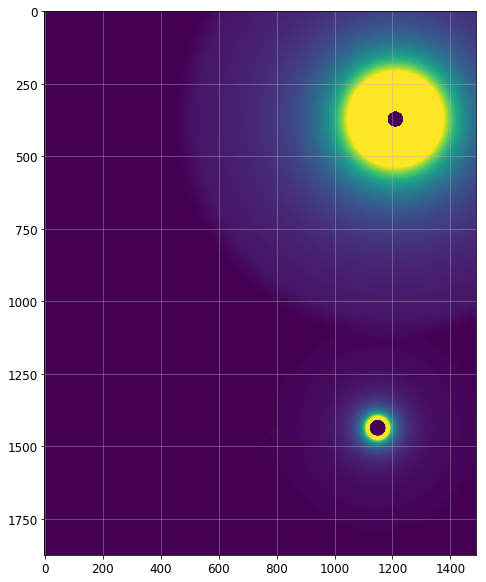

In [8]:
plt.figure(figsize=(10, 10))
plt.imshow(img, vmax=0.01)
plt.grid(alpha=0.5)
plt.show()

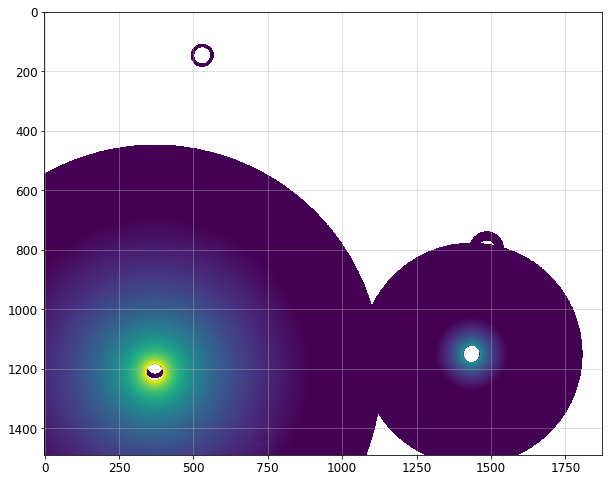

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(img.T, norm=LogNorm(), vmin=1e-3)
plt.grid(alpha=0.5)
plt.show()

In [10]:
index = np.argmin(tt['phot_g_mean_mag'])
print(index)
tt[[index]]

14


<Table length=1>
      ra          dec     isgalaxy ... inner_moffat_b x_in_sub_ccd y_in_sub_ccd
   float64      float64    uint8   ...    float32        int16        int16    
------------- ----------- -------- ... -------------- ------------ ------------
148.121840296 31.54267097        0 ...        3.87452         1211          372

In [11]:
ibx, iby = tt['x_in_sub_ccd'][index], tt['y_in_sub_ccd'][index]
print(ibx, iby)

1211 372


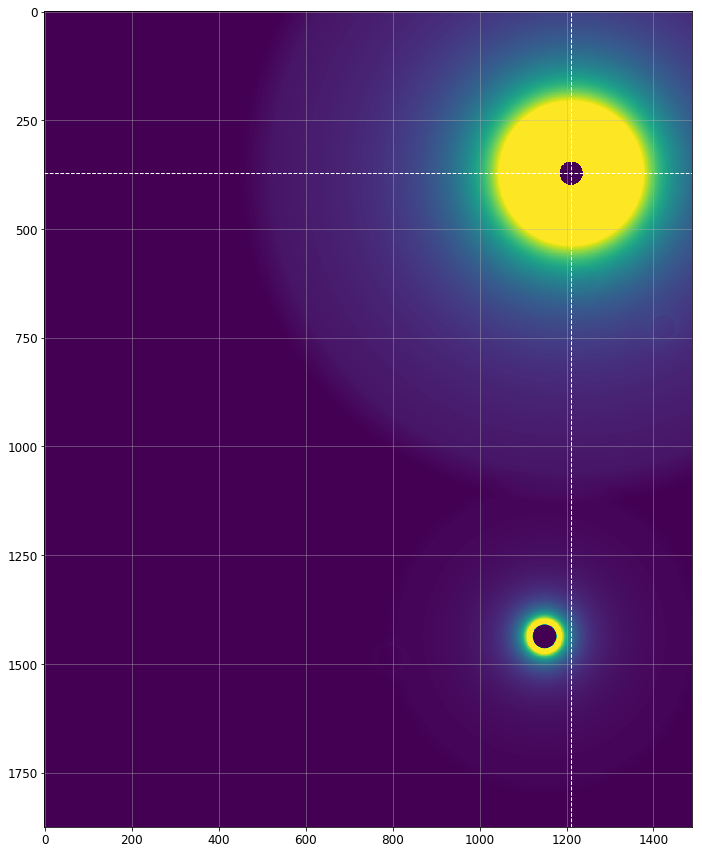

In [12]:
plt.figure(figsize=(15, 15))
plt.imshow(img, vmax=0.01)
plt.axhline(iby, color='w', ls='--', lw=1)
plt.axvline(ibx, color='w', ls='--', lw=1)
plt.grid(alpha=0.5)
plt.show()

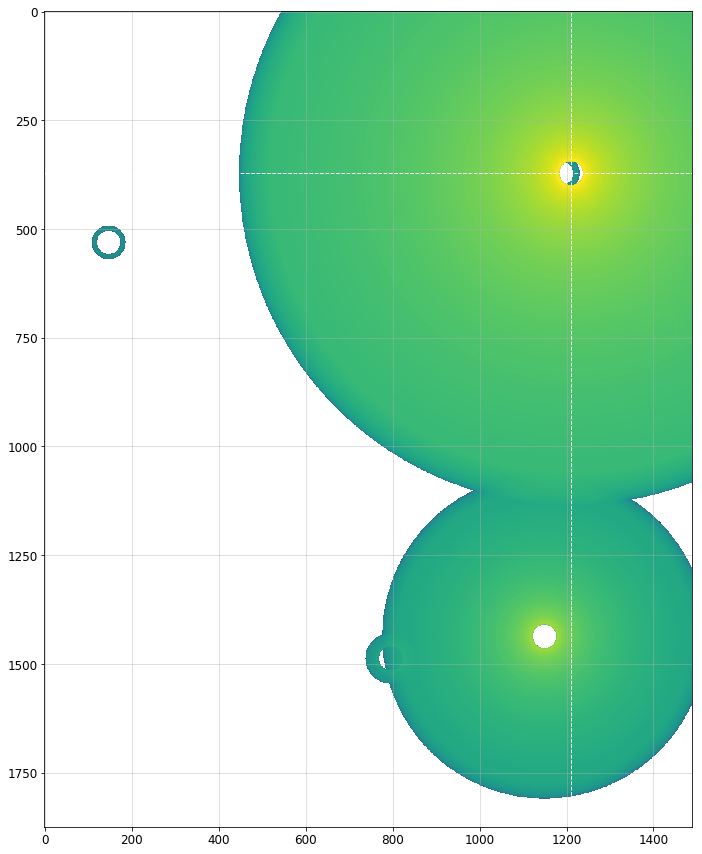

In [13]:
plt.figure(figsize=(15, 15))
plt.imshow(img, norm=LogNorm())
plt.axhline(iby, color='w', ls='--', lw=1)
plt.axvline(ibx, color='w', ls='--', lw=1)
plt.grid(alpha=0.5)
plt.show()

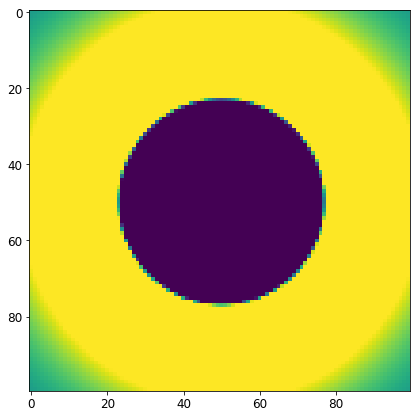

In [14]:
plt.figure(figsize=(15, 7))
plt.imshow((img[iby-50:iby+50, ibx-50:ibx+50]).T, vmax=0.1)

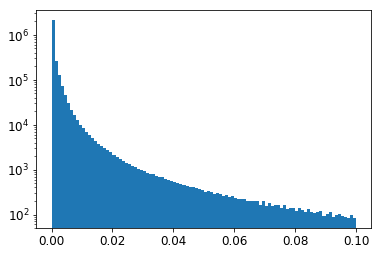

In [15]:
plt.hist(img.flatten(), 100, range=(0, 0.1), log=True);

-------

In [29]:
img = fitsio.read(fn, ext=3)
print(img.shape)

(1875, 1489)


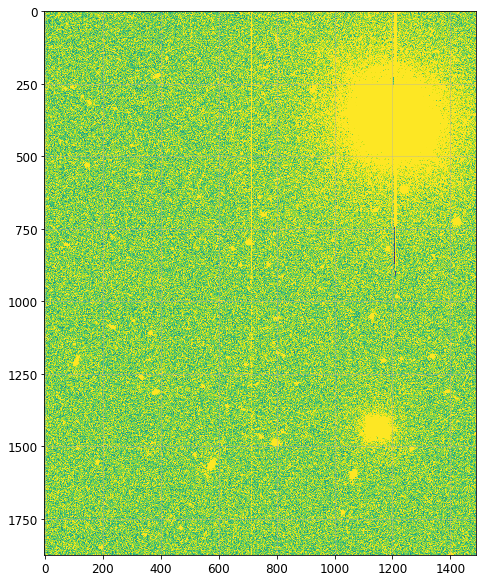

In [30]:
plt.figure(figsize=(10, 10))
plt.imshow(img, vmax=0.01)
plt.grid(alpha=0.5)
plt.show()

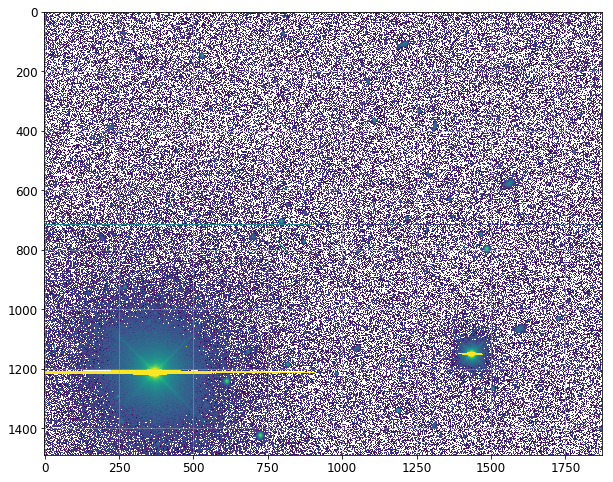

In [31]:
plt.figure(figsize=(10, 10))
plt.imshow(img.T, norm=LogNorm(), vmin=1e-3)
plt.grid(alpha=0.5)
plt.show()

In [32]:
index = np.argmin(tt['phot_g_mean_mag'])
print(index)
tt[[index]]

14


<Table length=1>
      ra          dec     isgalaxy ... inner_moffat_b x_in_sub_ccd y_in_sub_ccd
   float64      float64    uint8   ...    float32        int16        int16    
------------- ----------- -------- ... -------------- ------------ ------------
148.121840296 31.54267097        0 ...        3.87452         1211          372

In [33]:
ibx, iby = tt['x_in_sub_ccd'][index], tt['y_in_sub_ccd'][index]
print(ibx, iby)

1211 372


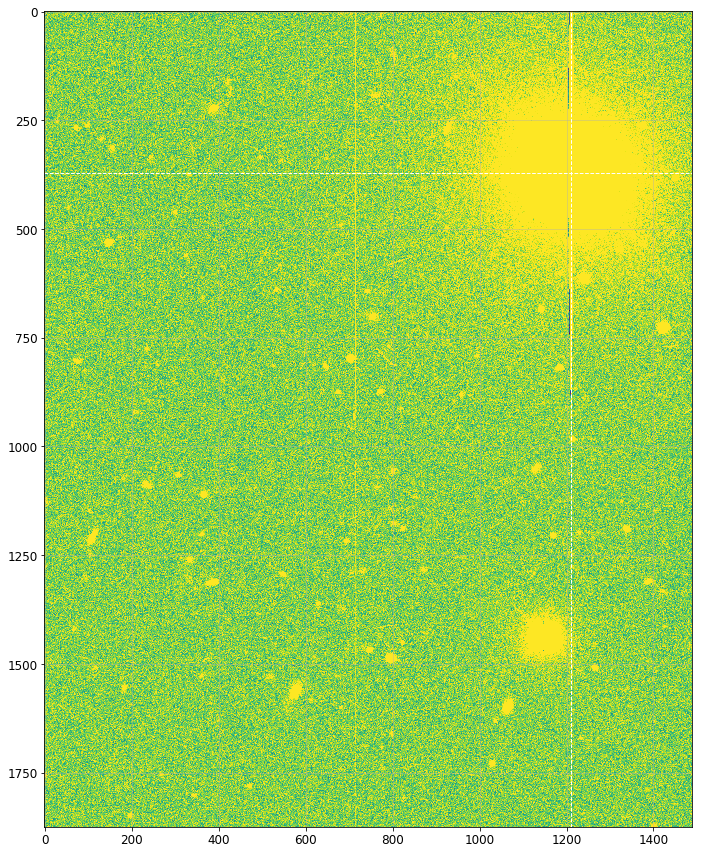

In [34]:
plt.figure(figsize=(15, 15))
plt.imshow(img, vmax=0.01)
plt.axhline(iby, color='w', ls='--', lw=1)
plt.axvline(ibx, color='w', ls='--', lw=1)
plt.grid(alpha=0.5)
plt.show()

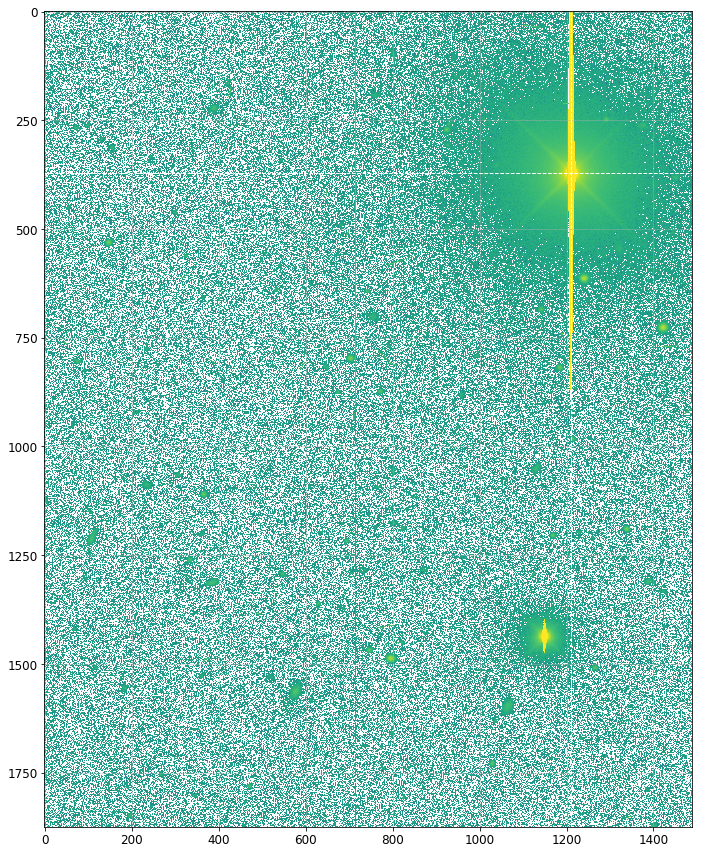

In [35]:
plt.figure(figsize=(15, 15))
plt.imshow(img, norm=LogNorm())
plt.axhline(iby, color='w', ls='--', lw=1)
plt.axvline(ibx, color='w', ls='--', lw=1)
plt.grid(alpha=0.5)
plt.show()

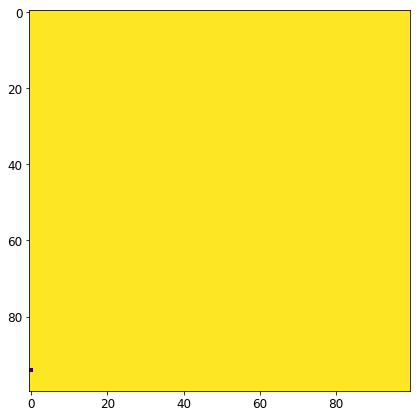

In [36]:
plt.figure(figsize=(15, 7))
plt.imshow((img[iby-50:iby+50, ibx-50:ibx+50]).T, vmax=0.1)

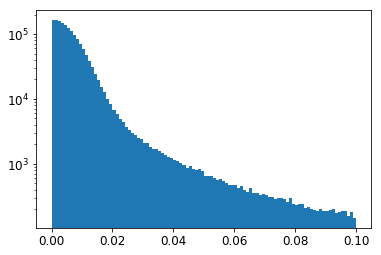

In [37]:
plt.hist(img.flatten(), 100, range=(0, 0.1), log=True);